##### Andrew Kistner
##### 0510 Data Science 
##### 11-2-2021

## Assignment 3
### Linear Regression

In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# read first dataset
df_test = pd.read_csv("DailyDelhiClimateTest.csv")
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [3]:
# read next dataset
df_train = pd.read_csv("DailyDelhiClimateTrain.csv")
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [7]:
# concatenate both datasets, this is easy since they have the same columns
dfconcat = pd.concat([df_test, df_train])
dfconcat.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [10]:
# check for missing values
# there are no missing values in any of the columns
dfconcat.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [13]:
# just to double check our data types are correct
dfconcat.dtypes

date             object
meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

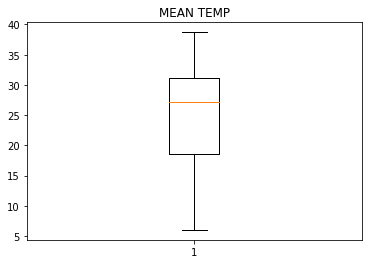

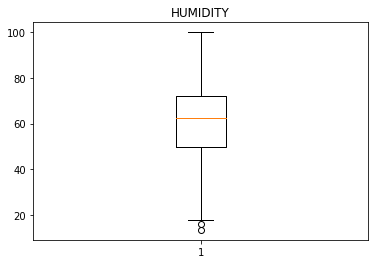

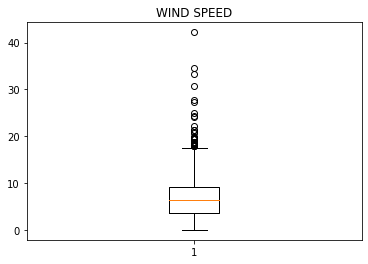

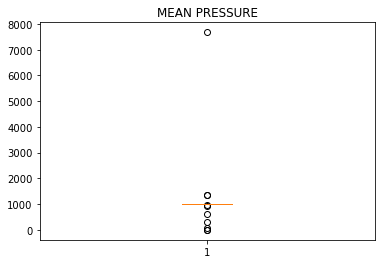

1009.0555555555557


In [63]:
# generate a boxplot for each dimension other than date to look for outliers
plt.boxplot(dfconcat['meantemp'])
plt.title('MEAN TEMP')
plt.show()
plt.boxplot(dfconcat['humidity'])
plt.title('HUMIDITY')
plt.show()
plt.boxplot(dfconcat['wind_speed'])
plt.title('WIND SPEED')
plt.show()
plt.boxplot(dfconcat['meanpressure'])
plt.title('MEAN PRESSURE')
plt.show()

Based on analyzing the boxplots above, it would make the most sense to remove the peak outliers from both the 'wind speed' and 'mean pressure' columns. These values are considerably higher than the average and do not have any outliers near them. After removing these values, we can re-evaluate the box plots to see the change in distribution and mean.

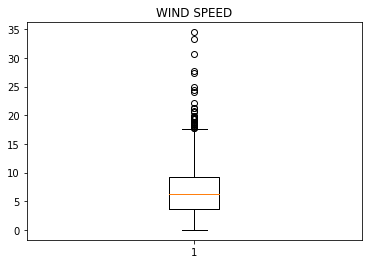

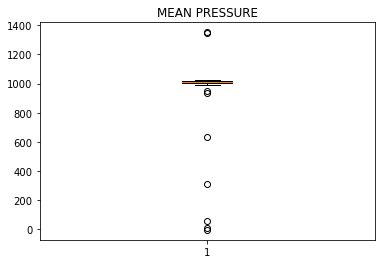

In [36]:
# find index of the outliers for wind speed and mean pressure
wsmax = dfconcat['wind_speed'].idxmax()
mpmax = dfconcat['meanpressure'].idxmax()

dfcorrect = dfconcat.drop(labels = [wsmax, mpmax], axis = 0)

plt.boxplot(dfcorrect['wind_speed'])
plt.title('WIND SPEED')
plt.show()
plt.boxplot(dfcorrect['meanpressure'])
plt.title('MEAN PRESSURE')
plt.show()

The results from removing the peak outlier in the 'mean pressure' column revealed several more outliers below the minimum value of the box plot. It would therefore be best to take these remaining outliers and replace them with the median value. 

1009.0555555555557


C:\Users\Andrew\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\Andrew\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


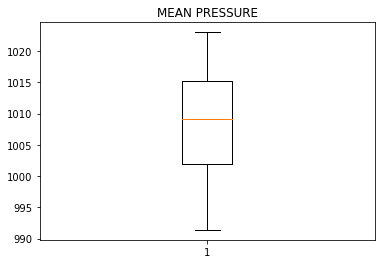

In [73]:

print(dfcorrect['meanpressure'].median())


dfcorrect.loc[dfcorrect['meanpressure'] < 950, "meanpressure"] = dfcorrect['meanpressure'].median()
dfcorrect.loc[dfcorrect['meanpressure'] > 1300, "meanpressure"] = dfcorrect['meanpressure'].median()
plt.boxplot(dfcorrect['meanpressure'])
plt.title('MEAN PRESSURE')
plt.show()

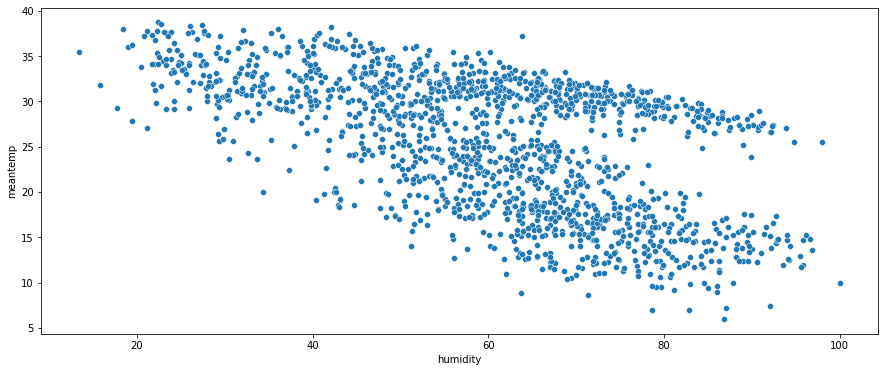

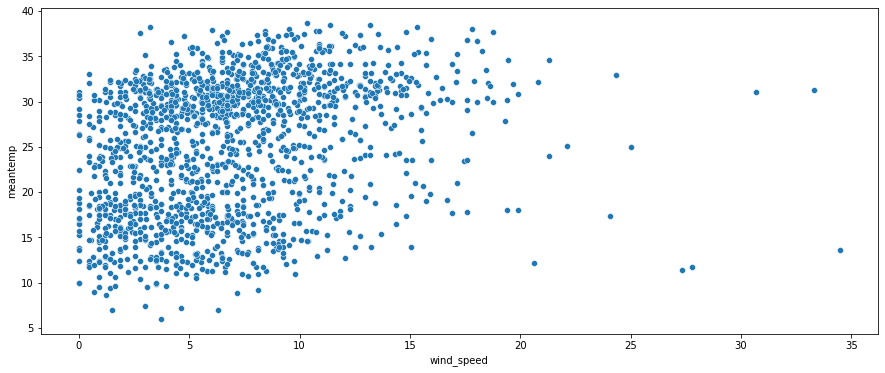

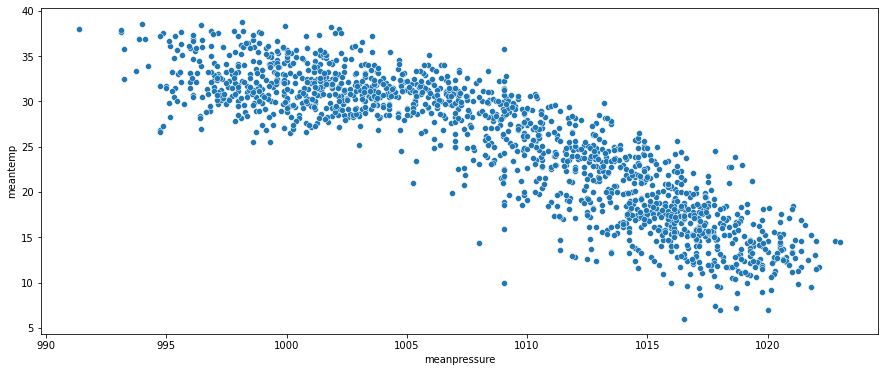

In [75]:
# generate density plots for the continuous data
X = dfcorrect[['humidity', 'wind_speed', 'meanpressure']]
y = dfcorrect[['meantemp']]
for col in X:
    fig, ax = plt.subplots(1,1, figsize=(15, 6))
    sns.scatterplot(data=dfcorrect, x=X[col], y=y['meantemp'])

<ipython-input-76-28705ba40c29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfcorrect["meanpressure"]=((dfcorrect["meanpressure"]-dfcorrect["meanpressure"].min())/(dfcorrect["meanpressure"].max()-dfcorrect["meanpressure"].min()))*100


<AxesSubplot:xlabel='meanpressure', ylabel='meantemp'>

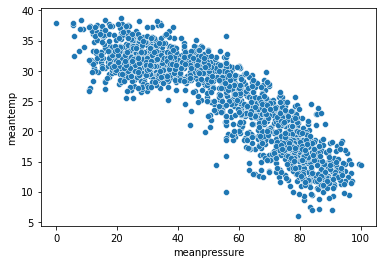

In [76]:
# 
dfcorrect["meanpressure"]=((dfcorrect["meanpressure"]-dfcorrect["meanpressure"].min())/(dfcorrect["meanpressure"].max()-dfcorrect["meanpressure"].min()))*100
sns.scatterplot(data=dfcorrect, x=dfcorrect['meanpressure'], y=dfcorrect['meantemp'])

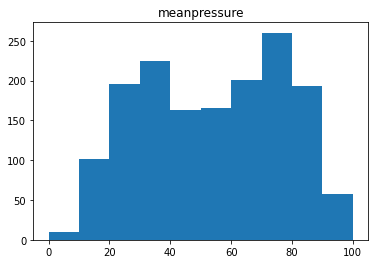

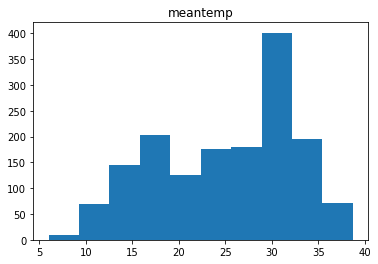

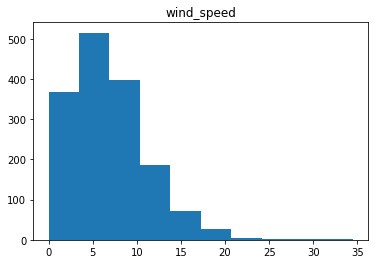

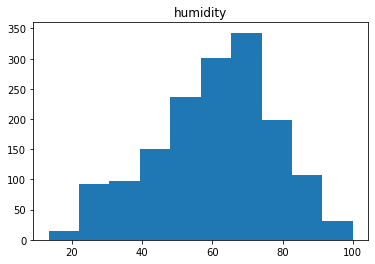

In [84]:
# generate histograms of continuous variables to look for normal distributions
plt.hist(dfcorrect['meanpressure'])
plt.title("meanpressure")
plt.show()
plt.hist(dfcorrect['meantemp'])
plt.title("meantemp")
plt.show()
plt.hist(dfcorrect['wind_speed'])
plt.title("wind_speed")
plt.show()
plt.hist(dfcorrect['humidity'])
plt.title("humidity")
plt.show()

Generating density plots for the continuous variables in the dataset showed signs of a linear relationship between 'meantemp' and 'meanpressure'. Although, the scale for 'meanpressure' was much larger than 'meantemp' so this was adjusted to a 0-100 scale to help confirm the suspicion of a correlation between the continuous variables. The dimension of 'wind_speed' did not show any relationship with 'meantemp' while humidity showed a slight linear relationship. 

Data transformation is not needed in this case because each continuous variable shows a somewhat normal distribution in the histograms that were generated.

**According to the assingment instructions, discrete data should be converted to dummy variables before training the linear regression model, but I do not see how to converting the date column to dummy variables. There is no binary (0 or 1) conversion for a discrete variable such as dates like there is for gender (male or female).**

In [88]:
# split data into training and test set. An 80/20 split will be used
# 80% of our data will be used for training, and 20% will be used for testing

#Predictors
X = dfcorrect[['meanpressure']]
#Response
y = dfcorrect[['meantemp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

In [89]:
#Analyze the size of the training and testing sets
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(1574, 1)
(1259, 1)
(315, 1)


In [95]:
# Train the LinearRegression model using training subset of data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)


In [93]:
# Evaluate the model using R^2 
r2 = r2_score(y_test, y_pred)
print("R-Squared: ", r2)

R-Squared:  0.7735388226847066


In [104]:
# Evaluate the model using RMSE (Root Mean Square Error)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)

RSME:  3.3949697248574515


**The first model created above used 'meanpressure' as a predictor to predict 'meantemp'. The model was satisfactory where 77% of the variance in the data can be explained by the regression model. The root mean square error (RSME) value for the model was 3.39. This value tells us how concentrated the data is around the line of best fit for our model. The closer the value is to 0, the more concentrated the data and the better the model.**

### Model 1 - Using 'meanpressure' and 'humidity' as predictors for 'meantemp'.

In [105]:
# split data into training and test set. An 80/20 split will be used
# 80% of our data will be used for training, and 20% will be used for testing

#Predictors
X = dfcorrect[['meanpressure', 'humidity']]
#Response
y = dfcorrect[['meantemp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

# Train the LinearRegression model using training subset of data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)
# Evaluate the model using R^2 
r2 = r2_score(y_test, y_pred)
print("R-Squared: ", r2)

# Evaluate the model using RMSE (Root Mean Square Error)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)

R-Squared:  0.8550522327261456
RSME:  2.716093963803269


### Model 2 - Using 'humidity' as a predictor for 'meantemp'.

In [106]:
# split data into training and test set. An 80/20 split will be used
# 80% of our data will be used for training, and 20% will be used for testing

#Predictors
X = dfcorrect[['humidity']]
#Response
y = dfcorrect[['meantemp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

# Train the LinearRegression model using training subset of data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)
# Evaluate the model using R^2 
r2 = r2_score(y_test, y_pred)
print("R-Squared: ", r2)

# Evaluate the model using RMSE (Root Mean Square Error)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)

R-Squared:  0.3933555550935759
RSME:  5.556561658948347


### Model 3 - Using 'meanpressure', 'humidity' and 'wind_speed' as predictors for 'meantemp'.

In [107]:
# split data into training and test set. An 80/20 split will be used
# 80% of our data will be used for training, and 20% will be used for testing

#Predictors
X = dfcorrect[['meanpressure', 'humidity', 'wind_speed']]
#Response
y = dfcorrect[['meantemp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=1)

# Train the LinearRegression model using training subset of data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Make predictions
y_pred = regression_model.predict(X_test)
# Evaluate the model using R^2 
r2 = r2_score(y_test, y_pred)
print("R-Squared: ", r2)

# Evaluate the model using RMSE (Root Mean Square Error)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print("RMSE: ", rmse)

R-Squared:  0.8580166972052977
RSME:  2.688175772143018


## CONCLUSION
### **The best model that was generated was model 3 which used 'meanpressure', 'humidity' and 'wind_speed' as predictors for 'meantemp'. This model was determined to be the best because it produced an R-Squared score of 0.858 which says the 85.8% of the variance in the data is explained by the model. Although, model 1 can also be considered the best model because the R-Squared values for these two models are incredibly similar. We also know that adding a predictor to a model automatically makes the R-Squared value increase, even if only by a small margin. Therefore, models 1 and 3 should be considered the best models. The decrease in the RMSE from model 1 to model 3 could also be contributed to the fact that the extra predictor adds more noise to the model. Overall, both models 1 and 3 are 'good' models based on the evaluation statistics. Although, I would not say they are 'great' models... ** 